In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Estadísticos básicos
## Estadística descriptiva: Medidas de tendencia central y dispersión

![letrero_promedio.jpg](../figs/letrero_promedio.jpg)

### Definiciones básicas:

**1. Promedio:** $$\bar{x}=\frac{\sum_{i=1}^{n}{x_i}}{n}$$

**2. Desviación estándar:** $$\sigma=\sqrt{\frac{\sum{(x_i-\bar{x})}}{n}}$$

### 1.1 Numpy para conjuntos de datos

In [3]:
data = np.random.randint(0,10, size=(10,15))

In [4]:
data

array([[5, 1, 9, 7, 0, 5, 2, 9, 4, 5, 5, 6, 2, 3, 3],
       [1, 9, 7, 8, 4, 7, 1, 4, 7, 1, 0, 4, 3, 4, 6],
       [1, 2, 1, 1, 7, 8, 3, 8, 3, 8, 2, 9, 5, 8, 7],
       [1, 4, 4, 8, 4, 6, 0, 5, 4, 6, 7, 3, 9, 4, 8],
       [6, 6, 3, 5, 3, 1, 4, 6, 8, 1, 3, 3, 2, 1, 6],
       [1, 6, 7, 2, 1, 6, 0, 5, 7, 4, 5, 0, 1, 7, 7],
       [5, 2, 8, 8, 4, 4, 1, 7, 6, 3, 9, 7, 6, 1, 8],
       [4, 5, 3, 3, 2, 0, 1, 4, 9, 0, 5, 4, 5, 6, 1],
       [3, 6, 3, 9, 0, 0, 4, 9, 2, 3, 0, 6, 0, 0, 1],
       [4, 1, 7, 2, 1, 9, 9, 0, 0, 5, 5, 8, 4, 0, 5]])

In [5]:
data.size

150

In [6]:
data.shape

(10, 15)

In [7]:
data.max()

9

In [8]:
data.max(axis=0)

array([6, 9, 9, 9, 7, 9, 9, 9, 9, 8, 9, 9, 9, 8, 8])

In [9]:
data.max(axis=1)

array([9, 9, 9, 9, 8, 7, 9, 9, 9, 9])

In [10]:
data.mean()

4.213333333333333

In [11]:
data.mean(axis=0)

array([3.1, 4.2, 5.2, 5.3, 2.6, 4.6, 2.5, 5.7, 5. , 3.6, 4.1, 5. , 3.7,
       3.4, 5.2])

In [12]:
data.mean(axis=1)

array([4.4       , 4.4       , 4.86666667, 4.86666667, 3.86666667,
       3.93333333, 5.26666667, 3.46666667, 3.06666667, 4.        ])

In [13]:
data.std()

2.765469620556737

In [14]:
data.std(axis=0)

array([1.86815417, 2.52190404, 2.56124969, 2.9       , 2.10713075,
       3.10483494, 2.57875939, 2.60959767, 2.7202941 , 2.37486842,
       2.73678644, 2.56904652, 2.53179778, 2.76405499, 2.52190404])

In [15]:
data.std(axis=1)

array([2.57681975, 2.75196899, 2.98589276, 2.44585818, 2.12498366,
       2.69485106, 2.56818137, 2.36267269, 3.06521705, 3.14112506])

In [16]:
np.unique(data, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([15, 21, 10, 16, 20, 16, 15, 14, 12, 11], dtype=int64))

### 1.2 Pandas para series temporales

In [17]:
df = pd.read_csv("../data/data.csv", index_col=0, parse_dates=True)

In [18]:
df.min()

Set1    0.284071
Set2    0.109954
dtype: float64

In [19]:
df.max()

Set1    18.829335
Set2    13.102474
dtype: float64

In [20]:
mean1 = df.Set1.mean()
mean2 = df.Set2.mean()

In [21]:
std1 = df.Set1.std()
std2 = df.Set2.std()

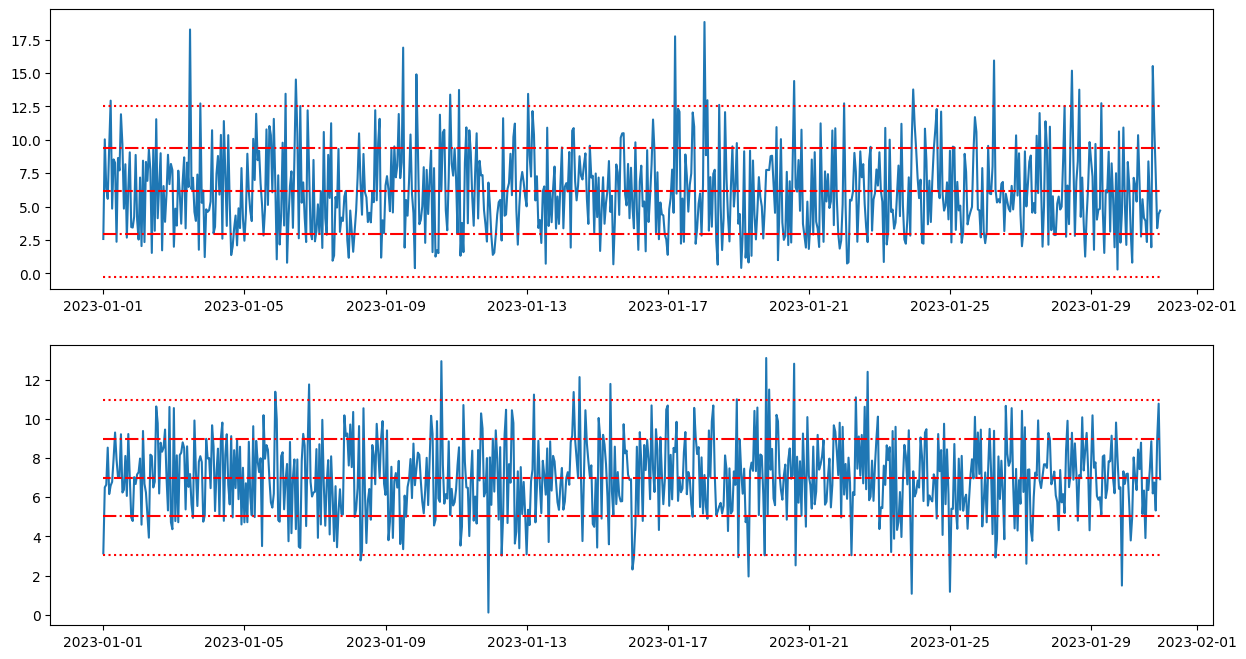

In [22]:
fig, ax = plt.subplots(figsize=(15,8), nrows=2)

mean = mean1
std = std1
ax[0].plot(df.Set1)
ax[0].hlines(y=mean, xmin=df.index[0], xmax=df.index[-1], ls="--", color="r")
ax[0].hlines(y=mean+std, xmin=df.index[0], xmax=df.index[-1], ls="-.", color="r")
ax[0].hlines(y=mean-std, xmin=df.index[0], xmax=df.index[-1], ls="-.", color="r")
ax[0].hlines(y=mean+2*std, xmin=df.index[0], xmax=df.index[-1], ls=":", color="r")
ax[0].hlines(y=mean-2*std, xmin=df.index[0], xmax=df.index[-1], ls=":", color="r")

mean = mean2
std = std2
ax[1].plot(df.Set2)
ax[1].hlines(y=mean, xmin=df.index[0], xmax=df.index[-1], ls="--", color="r")
ax[1].hlines(y=mean+std, xmin=df.index[0], xmax=df.index[-1], ls="-.", color="r")
ax[1].hlines(y=mean-std, xmin=df.index[0], xmax=df.index[-1], ls="-.", color="r")
ax[1].hlines(y=mean+2*std, xmin=df.index[0], xmax=df.index[-1], ls=":", color="r")
ax[1].hlines(y=mean-2*std, xmin=df.index[0], xmax=df.index[-1], ls=":", color="r")

In [23]:
def porcentaje(df, columna, num_std=1):
    mean = df[columna].mean()
    std = df[columna].std()
    filtro = df[(df[columna]<(mean+num_std*std)) & (df[columna]>(mean-num_std*std))]
    return len(filtro)/len(df)

In [24]:
porcentaje(df, "Set1")

0.6722222222222223

In [25]:
porcentaje(df, "Set1", 2)

0.9694444444444444

In [26]:
porcentaje(df, "Set1", 3)

0.9930555555555556

In [27]:
porcentaje(df, "Set2")

0.6722222222222223

In [28]:
porcentaje(df, "Set2", 2)

0.9611111111111111

In [29]:
porcentaje(df, "Set2", 3)

0.9944444444444445

In [30]:
df_6dias = df.resample("4D").agg(["mean", "std"])

In [31]:
df_6dias

Set1                Set2          
                mean       std      mean       std
Fecha                                             
2023-01-01  6.182879  3.132614  7.193204  1.705461
2023-01-05  5.999564  3.317556  6.905281  2.126067
2023-01-09  6.414335  3.356879  6.682808  2.079395
2023-01-13  6.217795  2.723889  7.102780  2.038007
2023-01-17  6.122413  3.685101  7.167668  2.137045
2023-01-21  6.058244  3.081044  7.106041  1.912968
2023-01-25  6.327209  3.078080  6.858896  1.910377
2023-01-29  5.825832  3.294243  6.948599  1.669189

### 1.3 Percentiles y boxplots

Un percentil es un estadístico que indica el valor en el cuál se encuentran un porcentaje de observaciones en un set de datos, es decir, representa la posición relativa de los datos.

- Percentil 25 -> Cuartil 1 -> Valor por debajo del cual se encuentra el 25% de los datos
- Percentil 50 -> Cuartil 2 -> Mediana -> Valor por debajo del cual se encuentra el 25% de los datos
- Percentil 75 -> Cuartil 3 -> Valor por debajo del cual se encuentra el 75% de los datos

**1. Mediana:** Es el percentil $q_{0.5}$ calculado como: 

$$
q_{0.5}= \begin{cases}x_{([n+1] / 2)}, & n \text { impar } \\ \frac{x_{(n / 2)}+x_{([n / 2]+1)}}{2}, & n \text { par }\end{cases}
$$

**2. Rango intercuartilico**:

$$IQR=q_{0.75}-q_{0.25}$$

In [42]:
df.quantile()

Set1    5.753440
Set2    6.997716
Name: 0.5, dtype: float64

In [33]:
df.describe()

,Set1,Set2
count,720.000000,720.000000
mean,6.164714,6.998797
std,3.202373,1.970287
min,0.284071,0.109954
25%,3.718896,5.641922
50%,5.753440,6.997716
75%,8.285998,8.374878
max,18.829335,13.102474


In [34]:
df[df.Set1<=3.718896]

,Set1,Set2
Fecha,,
2023-01-01 00:00:00,2.573525,3.130862
2023-01-01 09:00:00,2.366399,7.917033
2023-01-01 16:00:00,2.677097,6.062604
2023-01-01 19:00:00,3.467200,4.964675
2023-01-01 20:00:00,3.429175,4.782059
...,...,...
2023-01-30 04:00:00,0.801716,4.993273
2023-01-30 10:00:00,2.755219,8.781974
2023-01-30 14:00:00,2.347884,6.914821


In [49]:
q1_set1 = df.Set1.quantile(0.25)
q2_set1 = df.Set1.quantile(0.50)
q3_set1 = df.Set1.quantile(0.75)

q1_set2 = df.Set2.quantile(0.25)
q2_set2 = df.Set2.quantile(0.50)
q3_set2 = df.Set2.quantile(0.75)

In [45]:
df_order1 = df.sort_values(by=["Set1"], axis=0)
df_order1

,Set1,Set2
Fecha,,
2023-01-29 18:00:00,0.284071,8.005686
2023-01-09 20:00:00,0.388661,6.609704
2023-01-19 02:00:00,0.406338,7.258536
2023-01-18 10:00:00,0.651446,5.272158
2023-01-15 11:00:00,0.678498,5.098055
...,...,...
2023-01-26 06:00:00,15.944525,9.389035
2023-01-09 12:00:00,16.910460,3.343994
2023-01-17 05:00:00,17.754692,8.299224


In [46]:
df_order2 = df.sort_values(by=["Set2"], axis=0)
df_order2

,Set1,Set2
Fecha,,
2023-01-11 22:00:00,6.799053,0.109954
2023-01-23 22:00:00,9.951885,1.069213
2023-01-25 00:00:00,9.189308,1.169605
2023-01-29 21:00:00,4.538126,1.487389
2023-01-19 07:00:00,0.814849,1.951668
...,...,...
2023-01-14 12:00:00,8.774609,12.128745
2023-01-22 16:00:00,2.339376,12.397408
2023-01-20 14:00:00,14.409580,12.811071


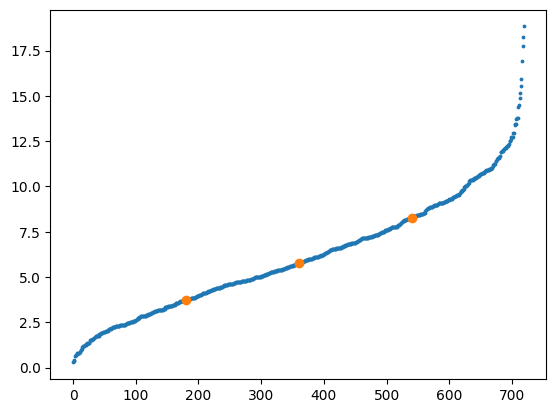

In [52]:
fig, ax = plt.subplots()
ax.scatter(np.arange(0,720,1), df_order1.Set1, s=3)
ax.scatter([180,360,540], [q1_set1,q2_set1,q3_set1])

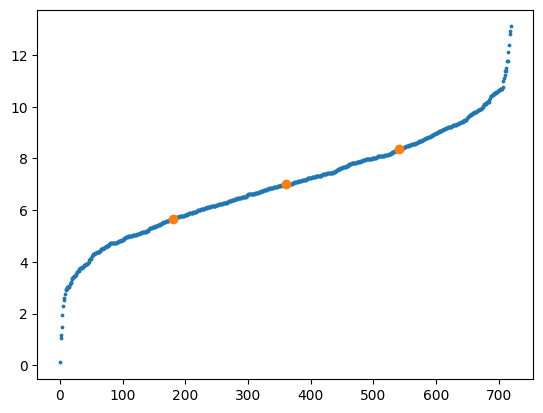

In [51]:
fig, ax = plt.subplots()
ax.scatter(np.arange(0,720,1), df_order2.Set2, s=3)
ax.scatter([180,360,540], [q1_set2,q2_set2,q3_set2])


In [59]:
df[df.Set1<=df.Set1.mean()]

,Set1,Set2
Fecha,,
2023-01-01 00:00:00,2.573525,3.130862
2023-01-01 03:00:00,5.581570,8.527606
2023-01-01 06:00:00,4.849315,6.781655
2023-01-01 09:00:00,2.366399,7.917033
2023-01-01 14:00:00,4.849502,6.372600
...,...,...
2023-01-30 16:00:00,5.498811,7.429191
2023-01-30 17:00:00,1.953687,8.851454
2023-01-30 21:00:00,3.381201,8.987160


In [60]:
df[df.Set2<=df.Set2.mean()]

,Set1,Set2
Fecha,,
2023-01-01 00:00:00,2.573525,3.130862
2023-01-01 01:00:00,10.038197,6.499461
2023-01-01 02:00:00,6.356871,6.632775
2023-01-01 04:00:00,9.477755,6.155952
2023-01-01 05:00:00,12.938061,6.591129
...,...,...
2023-01-30 15:00:00,8.389309,6.366576
2023-01-30 18:00:00,15.530133,6.191878
2023-01-30 19:00:00,11.040725,6.746344


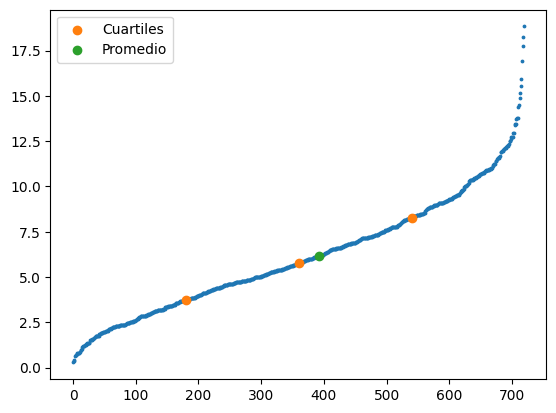

In [58]:
fig, ax = plt.subplots()
ax.scatter(np.arange(0,720,1), df_order1.Set1, s=3)
ax.scatter([180,360,540], [q1_set1,q2_set1,q3_set1], label="Cuartiles")
ax.scatter(393, df.Set1.mean(), label="Promedio")
ax.legend()

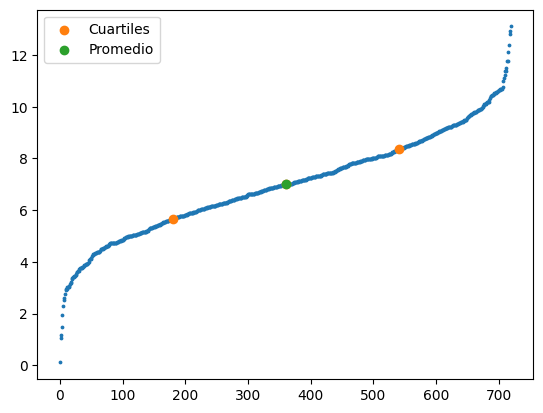

In [63]:
fig, ax = plt.subplots()
ax.scatter(np.arange(0,720,1), df_order2.Set2, s=3)
ax.scatter([180,360,540], [q1_set2,q2_set2,q3_set2], label="Cuartiles")
ax.scatter(360, df.Set2.mean(), label="Promedio")
ax.legend()

### Mi primer boxplot

El boxplot, o diagrama de caja y bigotes, es un resumen gráfico de la distribución de un conjunto de datos numéricos. Se conforma de las siguientes componentes:
1. Caja: Contiene la información del Q1 al Q3 representando el IQR
2. Línea en la caja: Ubica la posición de la mediana
3. Bigotes: Se extienden desde los extremos de la caja hasta los valores más pequeños o más grandes dentro de 1.5 veces el IQR desde los cuartiles. Estos pueden terminar en los valores extremos de los datos o en los límites dados por 1.5*IQR
4. Puntos atípicos (*outliers*): Valores que caen fuera los límites de los bigotes

In [97]:
IQR_1 = q3_set1 - q1_set1
IQR_2 = q3_set2 - q1_set2

(-4.0, 20.0)

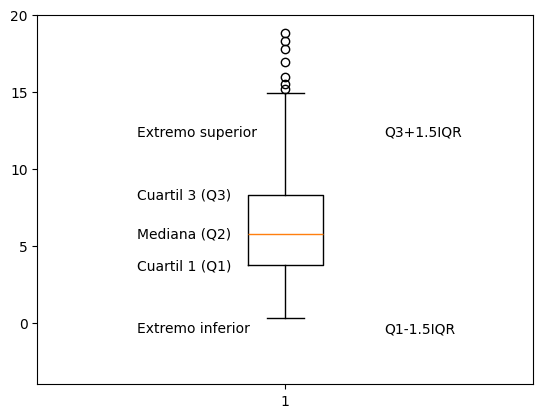

In [98]:
fig, ax = plt.subplots()
ax.boxplot(df.Set1, positions=[1]);
ax.text(0.7, q1_set1, "Cuartil 1 (Q1)", va="center")
ax.text(0.7, q2_set1, "Mediana (Q2)", va="center")
ax.text(0.7, q3_set1, "Cuartil 3 (Q3)", va="center")
ax.text(0.7, q1_set1-1.5*IQR_2, "Extremo inferior", va="center")
ax.text(0.7, q3_set1+1.5*IQR_2, "Extremo superior", va="center")
ax.text(1.2, q1_set1-1.5*IQR_2, "Q1-1.5IQR", va="center")
ax.text(1.2, q3_set1+1.5*IQR_2, "Q3+1.5IQR", va="center")

ax.set_ylim(-4,20)

(-1.0, 15.0)

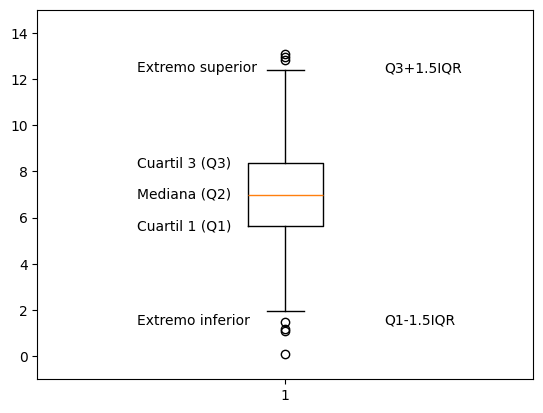

In [101]:
fig, ax = plt.subplots()
ax.boxplot(df.Set2, positions=[1]);
ax.text(0.7, q1_set2, "Cuartil 1 (Q1)", va="center")
ax.text(0.7, q2_set2, "Mediana (Q2)", va="center")
ax.text(0.7, q3_set2, "Cuartil 3 (Q3)", va="center")
ax.text(0.7, q1_set2-1.5*IQR_2, "Extremo inferior", va="center")
ax.text(0.7, q3_set2+1.5*IQR_2, "Extremo superior", va="center")
ax.text(1.2, q1_set2-1.5*IQR_2, "Q1-1.5IQR", va="center")
ax.text(1.2, q3_set2+1.5*IQR_2, "Q3+1.5IQR", va="center")

ax.set_ylim(-1,15)

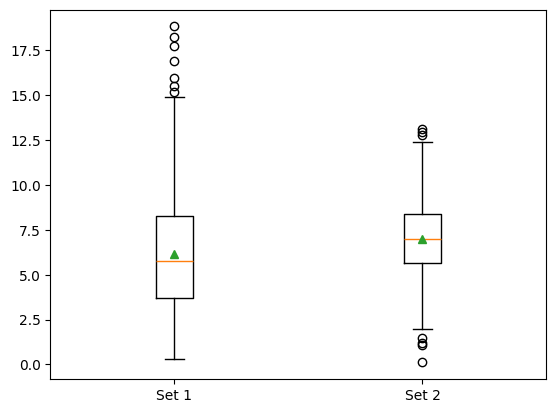

In [107]:
fig, ax = plt.subplots()
ax.boxplot([df.Set1, df.Set2], labels=["Set 1", "Set 2"], showmeans=True);